In [ ]:
import sys
sys.path.append('/home/redacted/dev/moral-summarization')

from moral_summarization.crowd import *
from moral_summarization.utils import *
from moral_summarization.data_utils import print_mean_max

base_folder = '../crowd_evaluation/prolific_results'

scores_df = pd.read_csv('../results/crowd_evaluation/annotators_scores.csv')
article_scores = pd.read_csv('../results/crowd_evaluation/article_scores.csv')

In [3]:
print_means(article_scores)

vanilla: 3.15
simple: 3.22
cot: 3.20
oracle: 3.33
class: 3.40


In [4]:
print_std(article_scores)

vanilla: 0.66
simple: 0.70
cot: 0.74
oracle: 0.64
class: 0.67


In [5]:
print_mean_max(scores_df)

vanilla
Max number of highlights: 31
Mean number of highlights: 6.60 \pm 4.74


In [6]:
wilcoxon = pairwise_wilcoxon(article_scores)
wilcoxon

,vanilla,simple,cot,oracle,class
vanilla,0.000,0.323,0.733,0.030,0.007
simple,0.323,0.000,0.760,0.036,0.006
cot,0.733,0.760,0.000,0.037,0.021
oracle,0.030,0.036,0.037,0.000,0.425
class,0.007,0.006,0.021,0.425,0.000


## Correlate number of highlights to scores

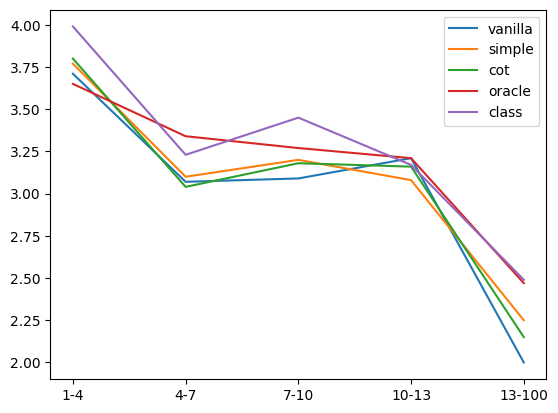

In [7]:
length_ranges = {
    0: (1, 4),
    1: (4, 7),
    2: (7, 10),
    3: (10, 13),
    4: (13, 100),
}

scores_per_highlights = get_scores_per_highlights(scores_df, length_ranges)
dump_latex_scores(scores_per_highlights.T, 'scores_per_highlights.dat', index=True)
plot_scores_per_highlight(scores_per_highlights, length_ranges)

In [8]:
scores_per_highlights

,0,1,2,3,4
vanilla,3.71,3.07,3.09,3.21,2.0
simple,3.77,3.1,3.2,3.08,2.25
cot,3.8,3.04,3.18,3.16,2.15
oracle,3.65,3.34,3.27,3.21,2.47
class,3.99,3.23,3.45,3.17,2.49
length,27,48,24,11,9


## Correlate automated and crowd evaluation

In [9]:
spearman_matrix = get_spearman_correlation('../results/llama_345_test_results.pickle', article_scores)
spearman_matrix

,vanilla,simple,cot,oracle,class
length,0.05,0.01,-0.12,0.02,0.05
moral_count,-0.19,-0.02,-0.18,-0.11,0.03
moral_div,-0.22,-0.2,-0.12,0.06,-0.07
summaC,-0.08,-0.15,0.15,0.06,0.28
BLANC,0.23,0.25,0.27,0.22,0.16
QaFactEval,0.05,0.28,0.22,0.02,0.17


## Filter where there was a moral word in the highlight that was preserved in the summary

In [ ]:
from moral_summarization.data_utils import load_results_df, print_mean_max
from moral_summarization.crowd import filter_scores_preserve_moral_words

literal_eval_columns = ['predicted_words', 'labeled_words']
results_class = load_results_df('../results/predictions_with_words.csv', literal_eval_columns)
summaries = pd.read_csv('../crowd_evaluation/Meta-Llama-3-70B-Instruct_345_summaries.csv', index_col=0)

filtered_scores = filter_scores_preserve_moral_words(scores_df, results_class, summaries)

In [11]:
filtered_article_scores = get_article_scores(filtered_scores)

In [12]:
print_means(filtered_article_scores)

vanilla: 3.63
simple: 3.54
cot: 3.66
oracle: 3.76
class: 3.71


In [13]:
print_std(filtered_article_scores)

vanilla: 1.08
simple: 1.03
cot: 1.01
oracle: 0.84
class: 1.01


In [14]:
(2.74 - 1.97) / 1.97

0.39086294416243667

In [15]:
print_mean_max(filtered_scores, print_methods=methods)

vanilla
Max number of highlights: 7
Mean number of highlights: 1.97 \pm 1.65
simple
Max number of highlights: 7
Mean number of highlights: 2.19 \pm 1.83
cot
Max number of highlights: 7
Mean number of highlights: 2.31 \pm 1.85
oracle
Max number of highlights: 9
Mean number of highlights: 2.74 \pm 2.15
class
Max number of highlights: 7
Mean number of highlights: 2.44 \pm 1.89


## Filter where there was a moral word in the highlight that was inside of a quote and preserved in the summary

In [ ]:
from moral_summarization.data_utils import *
from moral_summarization.utils import *
from moral_summarization.crowd import *

literal_eval_columns = ['predicted_words', 'labeled_words']
results_class = load_results_df('../results/predictions_with_words.csv', literal_eval_columns)
summaries = pd.read_csv('../crowd_evaluation/Meta-Llama-3-70B-Instruct_345_summaries.csv', index_col=0)

filtered_scores, quotes_with_highlights = filter_scores_preserve_moral_words(scores_df, results_class, summaries, filter_quotes=True)
filtered_article_scores = get_article_scores(filtered_scores)

In [17]:
print_mean_max(quotes_with_highlights, print_methods=['highlights_with_quotes'])

highlights_with_quotes
Max number of highlights: 7
Mean number of highlights: 1.34 \pm 1.54


In [18]:
print_means(filtered_article_scores)
print_std(filtered_article_scores)

vanilla: 3.51
simple: 3.65
cot: 3.44
oracle: 3.63
class: 3.57
vanilla: 1.30
simple: 1.40
cot: 1.49
oracle: 1.03
class: 1.21


In [19]:
print_mean_max(filtered_scores, print_methods=methods)

vanilla
Max number of highlights: 4
Mean number of highlights: 0.39 \pm 0.72
simple
Max number of highlights: 4
Mean number of highlights: 0.42 \pm 0.76
cot
Max number of highlights: 4
Mean number of highlights: 0.46 \pm 0.84
oracle
Max number of highlights: 4
Mean number of highlights: 0.55 \pm 0.93
class
Max number of highlights: 4
Mean number of highlights: 0.52 \pm 0.91


## Count number of quotes in summaries

In [ ]:
from moral_summarization.data_utils import *

summaries = pd.read_csv('../crowd_evaluation/Meta-Llama-3-70B-Instruct_345_summaries.csv', index_col=0)

quotes_df, moral_quotes_df = count_quotes_in_summaries(summaries)

In [21]:
print_mean_max(quotes_df, print_methods=prompt_types + ['article_text'])

vanilla
Max number of highlights: 7
Mean number of highlights: 1.15 \pm 1.41
simple
Max number of highlights: 5
Mean number of highlights: 1.32 \pm 1.27
cot
Max number of highlights: 11
Mean number of highlights: 3.98 \pm 3.15
oracle
Max number of highlights: 16
Mean number of highlights: 3.30 \pm 3.37
class
Max number of highlights: 17
Mean number of highlights: 3.37 \pm 3.46
article_text
Max number of highlights: 17
Mean number of highlights: 4.27 \pm 4.39


In [22]:
print_mean_max(moral_quotes_df, print_methods=prompt_types + ['article_text'])

vanilla
Max number of highlights: 3
Mean number of highlights: 0.38 \pm 0.78
simple
Max number of highlights: 4
Mean number of highlights: 0.55 \pm 0.92
cot
Max number of highlights: 7
Mean number of highlights: 1.73 \pm 2.07
oracle
Max number of highlights: 9
Mean number of highlights: 1.82 \pm 2.57
class
Max number of highlights: 8
Mean number of highlights: 1.40 \pm 2.10
article_text
Max number of highlights: 10
Mean number of highlights: 2.33 \pm 2.95


## Count percentage of quotes in articles

In [ ]:
from moral_summarization.data_utils import *

percentage_moral_in_quotes, percentage_quotes_in_text = distribution_quotes_in_articles(only_test_set=True)

In [26]:
print(np.mean(percentage_quotes_in_text))
print(np.mean(percentage_moral_in_quotes))

0.09305270027716046
0.1557256906806603
